In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.impute import KNNImputer


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'housing-prices-dataset' dataset.
Path to dataset files: /kaggle/input/housing-prices-dataset


In [5]:
# Se baixou o arquivo manualmente:
df = pd.read_csv("/kaggle/input/housing-prices-dataset/Housing.csv")

# Visualizar primeiras linhas
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("Valores ausentes por coluna:")
print(missing_values)

print("\nPorcentagem de valores ausentes:")
print(missing_percentage)


Valores ausentes por coluna:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Porcentagem de valores ausentes:
price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64


<Figure size 1000x600 with 0 Axes>

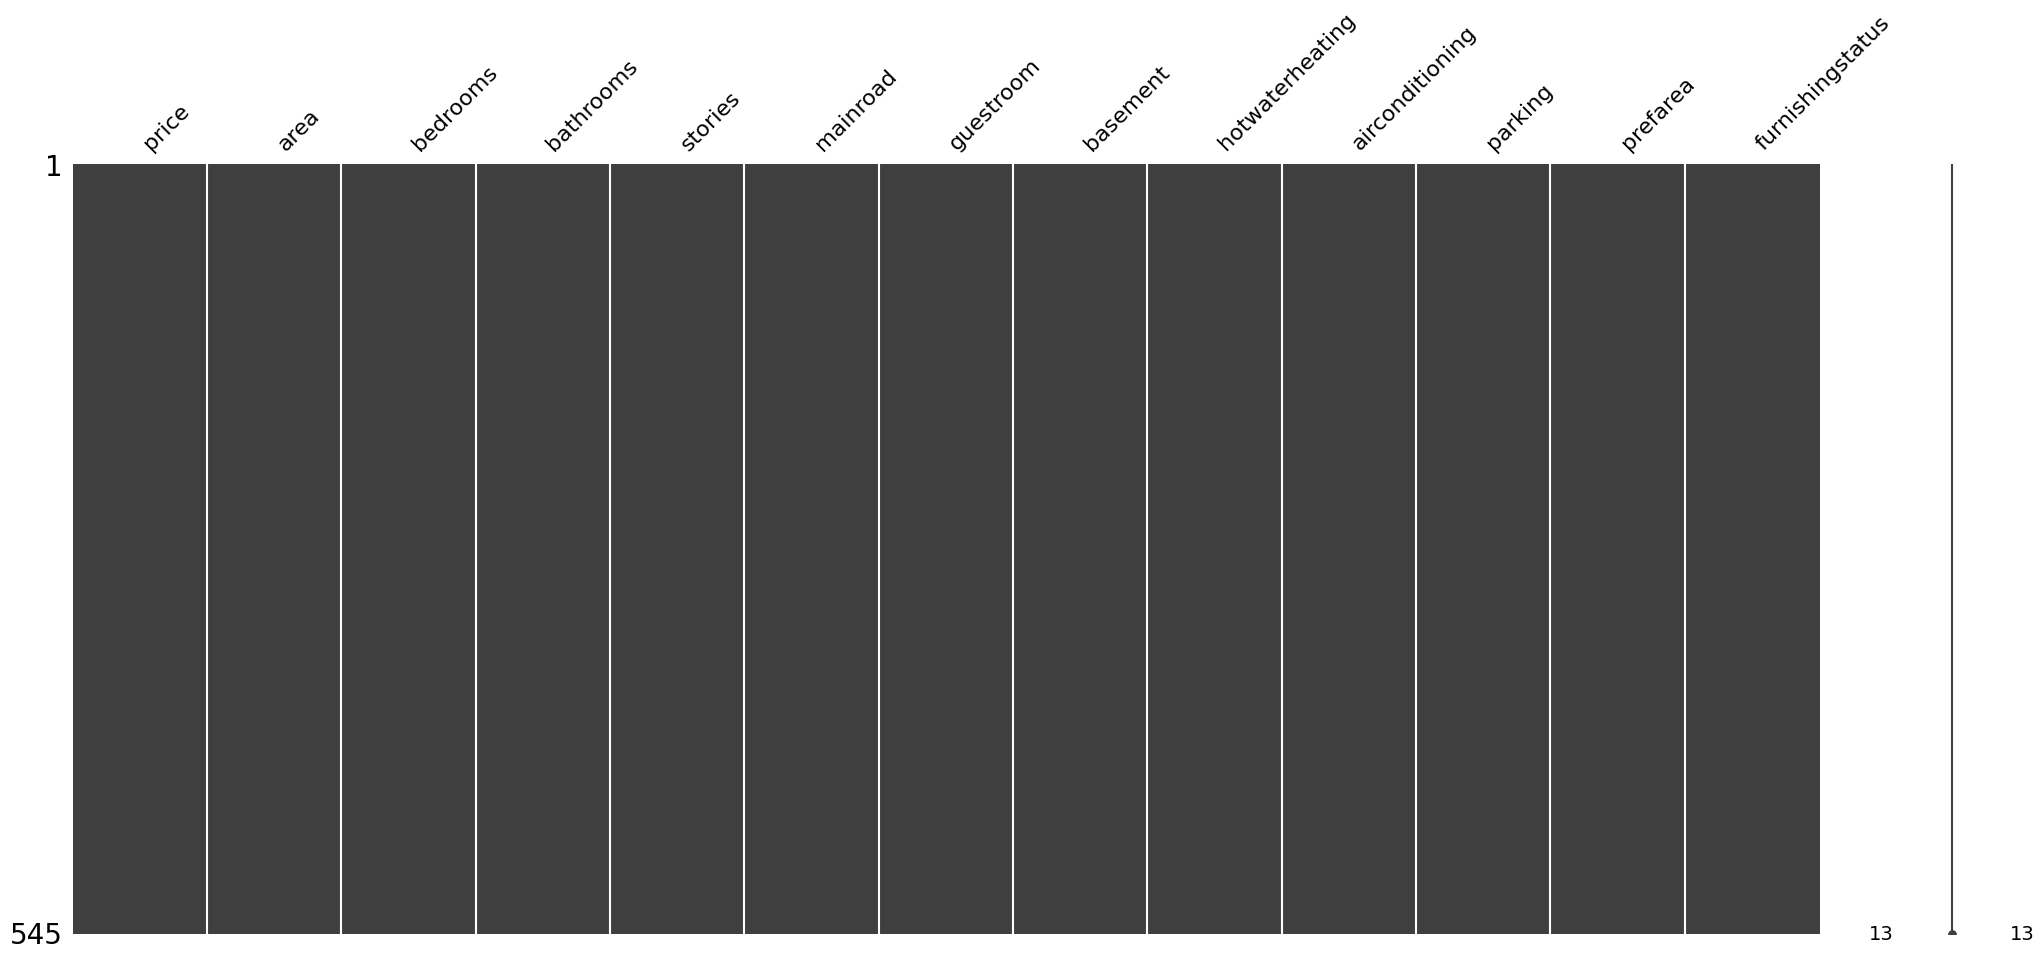

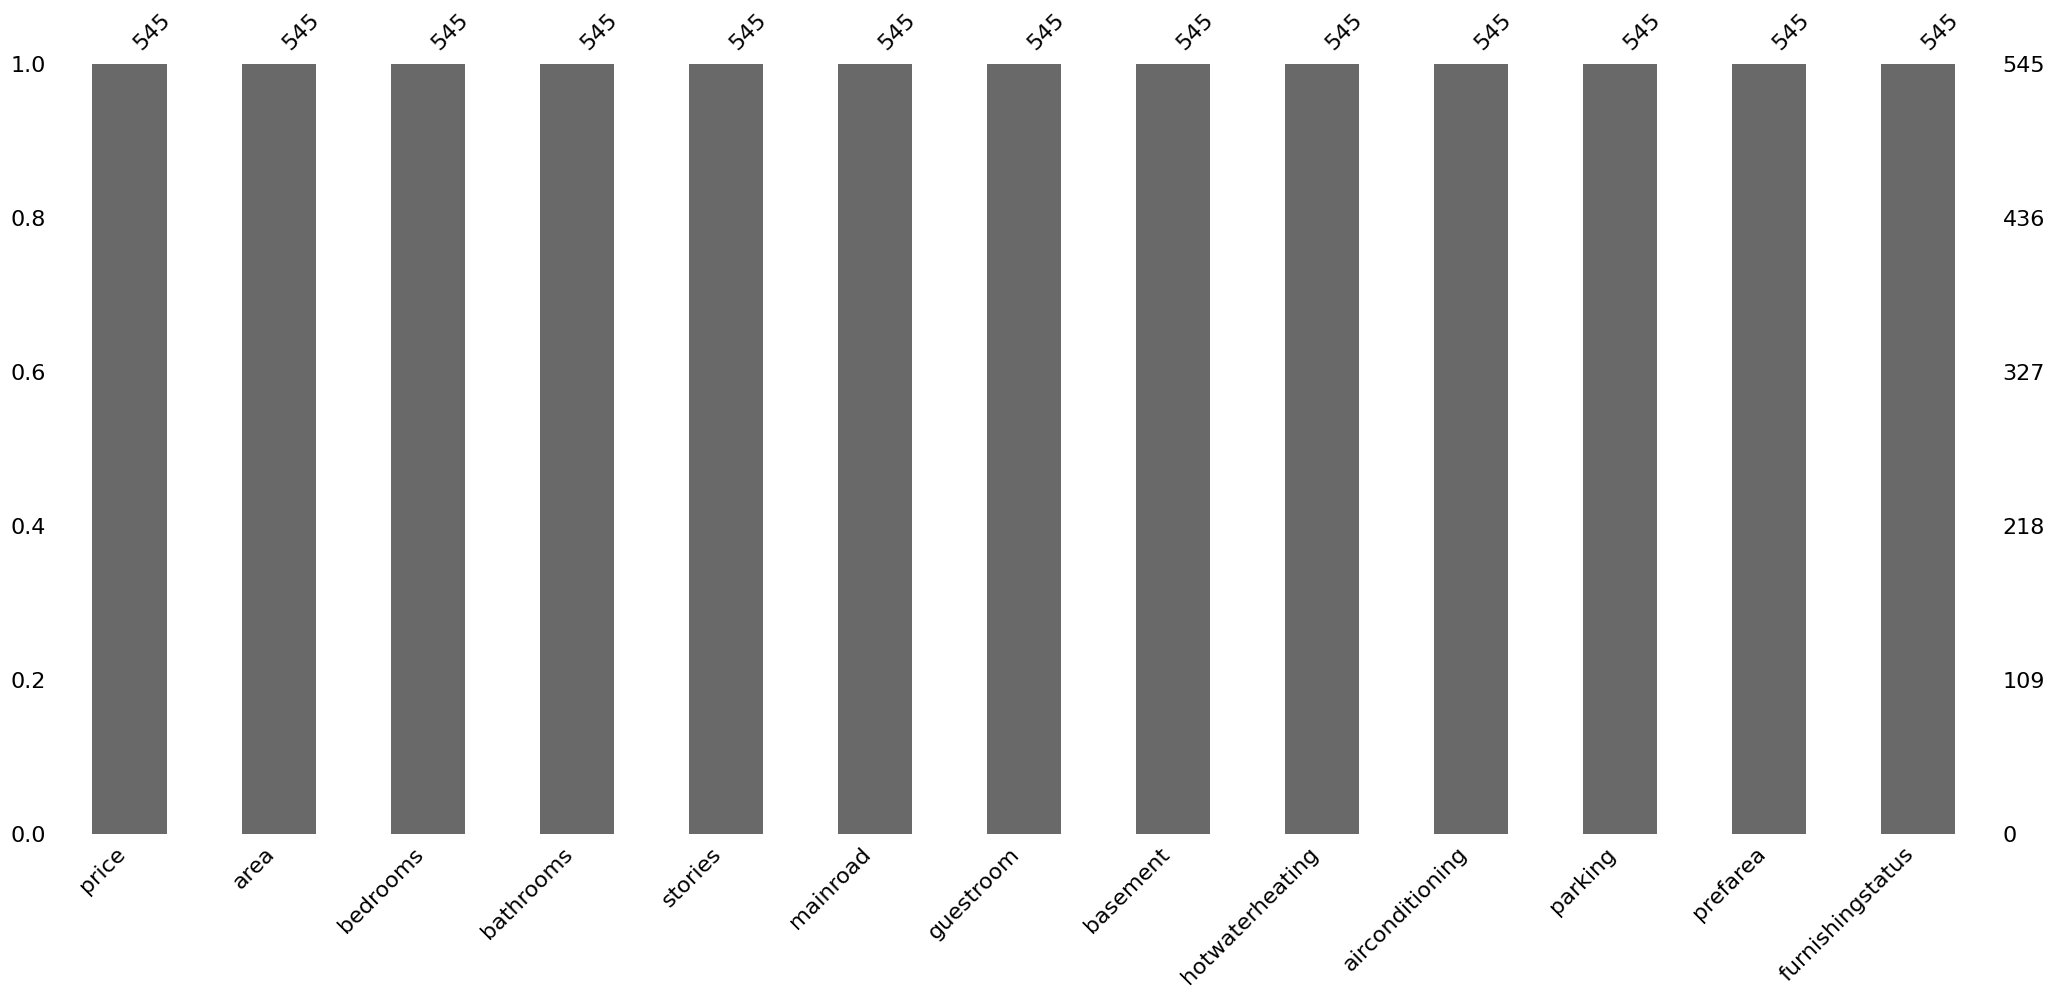

In [7]:
plt.figure(figsize=(10,6))
msno.matrix(df)
plt.show()

plt.figure(figsize=(10,6))
msno.bar(df)
plt.show()


In [8]:
df_drop = df.dropna()

print("Shape original:", df.shape)
print("Shape após remoção de linhas:", df_drop.shape)


Shape original: (545, 13)
Shape após remoção de linhas: (545, 13)


In [9]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns


In [10]:
df_mean = df.copy()
for col in numeric_cols:
    df_mean[col] = df_mean[col].fillna(df_mean[col].mean())

df_mean.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
df_median = df.copy()
for col in numeric_cols:
    df_median[col] = df_median[col].fillna(df_median[col].median())

df_median.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
df_knn = df.copy()

imputer = KNNImputer(n_neighbors=5)

df_knn[numeric_cols] = imputer.fit_transform(df_knn[numeric_cols])

df_knn.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000.0,8960.0,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000.0,9960.0,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000.0,7420.0,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished


In [13]:
comparacao = pd.DataFrame({
    "Original_missing": df.isnull().sum(),
    "Drop_missing": df_drop.isnull().sum(),
    "Mean_missing": df_mean.isnull().sum(),
    "Median_missing": df_median.isnull().sum(),
    "KNN_missing": df_knn.isnull().sum()
})

comparacao


,Original_missing,Drop_missing,Mean_missing,Median_missing,KNN_missing
price,0,0,0,0,0
area,0,0,0,0,0
bedrooms,0,0,0,0,0
bathrooms,0,0,0,0,0
stories,0,0,0,0,0
mainroad,0,0,0,0,0
guestroom,0,0,0,0,0
basement,0,0,0,0,0
hotwaterheating,0,0,0,0,0
airconditioning,0,0,0,0,0


In [14]:
print("Resumo final:")
print(comparacao)


Resumo final:
                  Original_missing  Drop_missing  Mean_missing  \
price                            0             0             0   
area                             0             0             0   
bedrooms                         0             0             0   
bathrooms                        0             0             0   
stories                          0             0             0   
mainroad                         0             0             0   
guestroom                        0             0             0   
basement                         0             0             0   
hotwaterheating                  0             0             0   
airconditioning                  0             0             0   
parking                          0             0             0   
prefarea                         0             0             0   
furnishingstatus                 0             0             0   

                  Median_missing  KNN_missing  
price        